<a href="https://colab.research.google.com/github/Ayushj-30/infrrd_assignment/blob/main/infrrd_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## LOADING DATASET

In [ ]:
!unzip /content/dataset.zip -d /content/

Archive:  /content/dataset.zip
   creating: /content/dataset/
  inflating: /content/dataset/.DS_Store  
  inflating: /content/__MACOSX/dataset/._.DS_Store  
   creating: /content/dataset/val_w_ann/
   creating: /content/dataset/train/
   creating: /content/dataset/val/
  inflating: /content/dataset/val_w_ann/.DS_Store  
  inflating: /content/__MACOSX/dataset/val_w_ann/._.DS_Store  
  inflating: /content/dataset/val_w_ann/val_ids.tsv  
   creating: /content/dataset/val_w_ann/boxes_transcripts_labels/
  inflating: /content/dataset/train/.DS_Store  
  inflating: /content/__MACOSX/dataset/train/._.DS_Store  
   creating: /content/dataset/train/images/
   creating: /content/dataset/train/boxes_transcripts_labels/
  inflating: /content/dataset/train/train_ids.tsv  
  inflating: /content/dataset/val/.DS_Store  
  inflating: /content/__MACOSX/dataset/val/._.DS_Store  
   creating: /content/dataset/val/images/
  inflating: /content/dataset/val/val_ids.tsv  
   creating: /content/dataset/val/box

## CREATING DATAFRAME

In [ ]:
import os
import pandas as pd

# Folder containing TSV files
folder_path = '/content/dataset/train/boxes_transcripts_labels'

# List all TSV files in the folder
tsv_files = [f for f in os.listdir(folder_path) if f.endswith('.tsv')]

# Load each TSV file into a pandas DataFrame
dataframes = {}
for file in tsv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, sep=',')
    df.columns=["start_index", "end_index", "x_top_left", "y_top_left",
                "x_bottom_right", "y_bottom_right", "transcript", "field"]
    dataframes[file] = df

# (Optional) Concatenate all DataFrames into a single one
combined_df = pd.concat(dataframes.values(), ignore_index=True)

# Display the combined DataFrame
print(combined_df)


        start_index  end_index  x_top_left  y_top_left  x_bottom_right  \
0                12         16         149          21             176   
1                18         22         179          21             213   
2                24         28         216          21             256   
3                37         37         323          19             334   
4                39         45         350          19             400   
...             ...        ...         ...         ...             ...   
237011        10079      10081         305        3070             355   
237012        10083      10086         361        3069             437   
237013        10088      10089         443        3068             475   
237014        10091      10094         481        3067             561   
237015        10096      10099         567        3065             617   

        y_bottom_right transcript  field  
0                   34      tips,  OTHER  
1                   34   

## EDA

In [ ]:
print(combined_df.head())

   start_index  end_index  x_top_left  y_top_left  x_bottom_right  \
0           12         16         149          21             176   
1           18         22         179          21             213   
2           24         28         216          21             256   
3           37         37         323          19             334   
4           39         45         350          19             400   

   y_bottom_right transcript  field  
0              34      tips,  OTHER  
1              34      other  OTHER  
2              35      comp.  OTHER  
3              34          2  OTHER  
4              34    Federal  OTHER  


In [ ]:
print(combined_df.shape)

(237016, 8)


In [ ]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237016 entries, 0 to 237015
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   start_index     237016 non-null  int64 
 1   end_index       237016 non-null  int64 
 2   x_top_left      237016 non-null  int64 
 3   y_top_left      237016 non-null  int64 
 4   x_bottom_right  237016 non-null  int64 
 5   y_bottom_right  237016 non-null  int64 
 6   transcript      236958 non-null  object
 7   field           237016 non-null  object
dtypes: int64(6), object(2)
memory usage: 14.5+ MB
None


In [ ]:
print(combined_df.describe())

         start_index      end_index     x_top_left     y_top_left  \
count  237016.000000  237016.000000  237016.000000  237016.000000   
mean     5881.222441    5884.992494     886.643404    1184.975584   
std      4906.396842    4906.319348     614.312914     772.900690   
min         0.000000       0.000000       2.000000       1.000000   
25%      1784.000000    1788.000000     346.000000     554.000000   
50%      4621.000000    4625.000000     818.000000    1052.000000   
75%      9108.000000    9112.000000    1351.000000    1774.000000   
max     24646.000000   24654.000000    2395.000000    3070.000000   

       x_bottom_right  y_bottom_right  
count   237016.000000   237016.000000  
mean       939.840859     1211.422520  
std        616.639337      776.262841  
min         20.000000       18.000000  
25%        398.000000      576.000000  
50%        870.000000     1077.000000  
75%       1398.000000     1805.000000  
max       2458.000000     3103.000000  


In [ ]:
print(combined_df.dtypes)

start_index        int64
end_index          int64
x_top_left         int64
y_top_left         int64
x_bottom_right     int64
y_bottom_right     int64
transcript        object
field             object
dtype: object


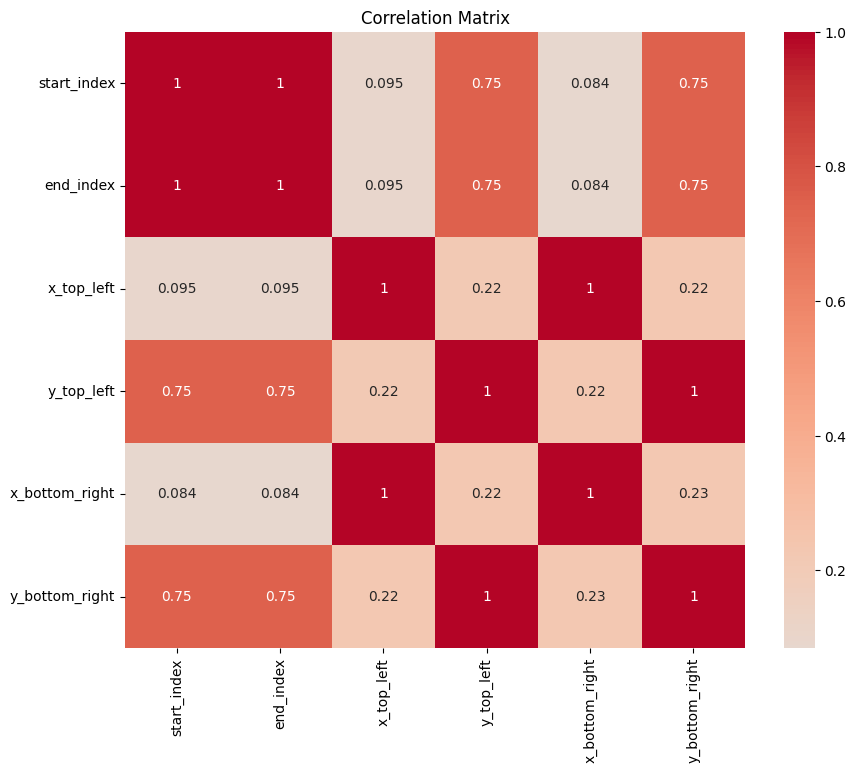

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns from the DataFrame
numeric_df = combined_df.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
combined_df["field"].value_counts()

,count
field,
OTHER,221983
employerAddressStreet_name,2257
employerName,1953
employeeName,1123
box2FederalIncomeTaxWithheld,1105
box1WagesTipsAndOtherCompensations,1043
box16StateWagesTips,1042
box17StateIncomeTax,1022
box4SocialSecurityTaxWithheld,1008


In [ ]:
print(combined_df.isnull().sum())

start_index        0
end_index          0
x_top_left         0
y_top_left         0
x_bottom_right     0
y_bottom_right     0
transcript        58
field              0
dtype: int64


In [ ]:
combined_df["transcript"].fillna("",inplace=True)

In [ ]:
print(combined_df.isnull().sum())

start_index       0
end_index         0
x_top_left        0
y_top_left        0
x_bottom_right    0
y_bottom_right    0
transcript        0
field             0
dtype: int64


In [ ]:
combined_df["transcript"].unique()

array(['tips,', 'other', 'comp.', ..., '438', '21317', '389-53-43'],
      dtype=object)

In [ ]:
import matplotlib.pyplot as plt

# Calculate the center points of the tokens
combined_df['x_center'] = (combined_df['x_top_left'] + combined_df['x_bottom_right']) / 2
combined_df['y_center'] = (combined_df['y_top_left'] + combined_df['y_bottom_right']) / 2

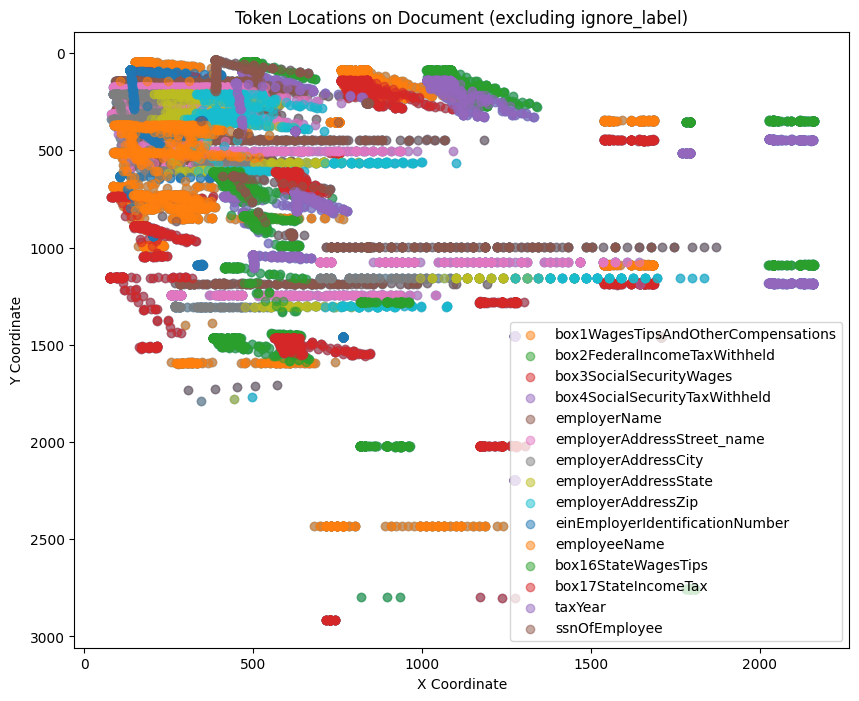

In [ ]:
filtered_df = combined_df[combined_df['field'] != 'OTHER']

# Plot the token locations
plt.figure(figsize=(10, 8))
plt.scatter(filtered_df['x_center'], filtered_df['y_center'], alpha=0.5)

# Optionally, color tokens by their field
unique_fields = filtered_df['field'].unique()
for field in unique_fields:
    subset = filtered_df[filtered_df['field'] == field]
    plt.scatter(subset['x_center'], subset['y_center'], label=field, alpha=0.5)

# Flip the y-axis to match the document layout
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Token Locations on Document (excluding ignore_label)')
plt.legend()
plt.show()


In [ ]:
filtered_df.shape

(15033, 10)

In [ ]:
sample_data = combined_df.sample(10, random_state=42)
print(sample_data[['transcript', 'field']])

        transcript  field
48369           EE  OTHER
180316    Employee  OTHER
3206      withheld  OTHER
168430         BOX  OTHER
95392   Department  OTHER
29082         name  OTHER
183287         890  OTHER
302            568  OTHER
179327  Department  OTHER
30673          Box  OTHER


In [ ]:
combined_df['transcript'] = combined_df['transcript'].astype(str)

In [ ]:
# Top-left corner coordinates
combined_df['x_top_left'] = combined_df['x_top_left'].astype(float)
combined_df['y_top_left'] = combined_df['y_top_left'].astype(float)

# Bottom-right corner coordinates
combined_df['x_bottom_right'] = combined_df['x_bottom_right'].astype(float)
combined_df['y_bottom_right'] = combined_df['y_bottom_right'].astype(float)

# Center coordinates
combined_df['x_center'] = (combined_df['x_top_left'] + combined_df['x_bottom_right']) / 2
combined_df['y_center'] = (combined_df['y_top_left'] + combined_df['y_bottom_right']) / 2


In [ ]:
# Width of the bounding box
combined_df['width'] = combined_df['x_bottom_right'] - combined_df['x_top_left']

# Height of the bounding box
combined_df['height'] = combined_df['y_bottom_right'] - combined_df['y_top_left']

# Aspect ratio (width to height ratio)
combined_df['aspect_ratio'] = combined_df['width'] / combined_df['height']


In [ ]:
# Previous token's transcript
combined_df['prev_transcript'] = combined_df['transcript'].shift(1).fillna('')

# Next token's transcript
combined_df['next_transcript'] = combined_df['transcript'].shift(-1).fillna('')


In [ ]:
# Previous token's coordinates
combined_df['prev_x_center'] = combined_df['x_center'].shift(1).fillna(0)
combined_df['prev_y_center'] = combined_df['y_center'].shift(1).fillna(0)

# Next token's coordinates
combined_df['next_x_center'] = combined_df['x_center'].shift(-1).fillna(0)
combined_df['next_y_center'] = combined_df['y_center'].shift(-1).fillna(0)

# Distance to previous token
combined_df['dist_to_prev_token'] = ((combined_df['x_center'] - combined_df['prev_x_center'])**2 +
                                     (combined_df['y_center'] - combined_df['prev_y_center'])**2)**0.5

# Distance to next token
combined_df['dist_to_next_token'] = ((combined_df['x_center'] - combined_df['next_x_center'])**2 +
                                     (combined_df['y_center'] - combined_df['next_y_center'])**2)**0.5


In [ ]:
print(combined_df.head())

   start_index  end_index  x_top_left  y_top_left  x_bottom_right  \
0           12         16       149.0        21.0           176.0   
1           18         22       179.0        21.0           213.0   
2           24         28       216.0        21.0           256.0   
3           37         37       323.0        19.0           334.0   
4           39         45       350.0        19.0           400.0   

   y_bottom_right transcript  field  x_center  y_center  ...  height  \
0            34.0      tips,  OTHER     162.5      27.5  ...    13.0   
1            34.0      other  OTHER     196.0      27.5  ...    13.0   
2            35.0      comp.  OTHER     236.0      28.0  ...    14.0   
3            34.0          2  OTHER     328.5      26.5  ...    15.0   
4            34.0    Federal  OTHER     375.0      26.5  ...    15.0   

   aspect_ratio  prev_transcript next_transcript prev_x_center  prev_y_center  \
0      2.076923                            other           0.0         

In [ ]:
print(combined_df.isnull().sum())

start_index           0
end_index             0
x_top_left            0
y_top_left            0
x_bottom_right        0
y_bottom_right        0
transcript            0
field                 0
x_center              0
y_center              0
width                 0
height                0
aspect_ratio          0
prev_transcript       0
next_transcript       0
prev_x_center         0
prev_y_center         0
next_x_center         0
next_y_center         0
dist_to_prev_token    0
dist_to_next_token    0
dtype: int64


In [ ]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237016 entries, 0 to 237015
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   start_index         237016 non-null  int64  
 1   end_index           237016 non-null  int64  
 2   x_top_left          237016 non-null  float64
 3   y_top_left          237016 non-null  float64
 4   x_bottom_right      237016 non-null  float64
 5   y_bottom_right      237016 non-null  float64
 6   transcript          237016 non-null  object 
 7   field               237016 non-null  object 
 8   x_center            237016 non-null  float64
 9   y_center            237016 non-null  float64
 10  width               237016 non-null  float64
 11  height              237016 non-null  float64
 12  aspect_ratio        237016 non-null  float64
 13  prev_transcript     237016 non-null  object 
 14  next_transcript     237016 non-null  object 
 15  prev_x_center       237016 non-nul

In [ ]:
sample_data = combined_df.sample(10, random_state=42)
print(sample_data[['prev_transcript', 'next_transcript']])

       prev_transcript next_transcript
48369              668             682
180316              3.             W-4
3206               tax          201093
168430             iD.             Box
95392        Statement              of
29082            first             and
183287               V           32712
302              Suite             210
179327      562-42-623              of
30673              W.2              16


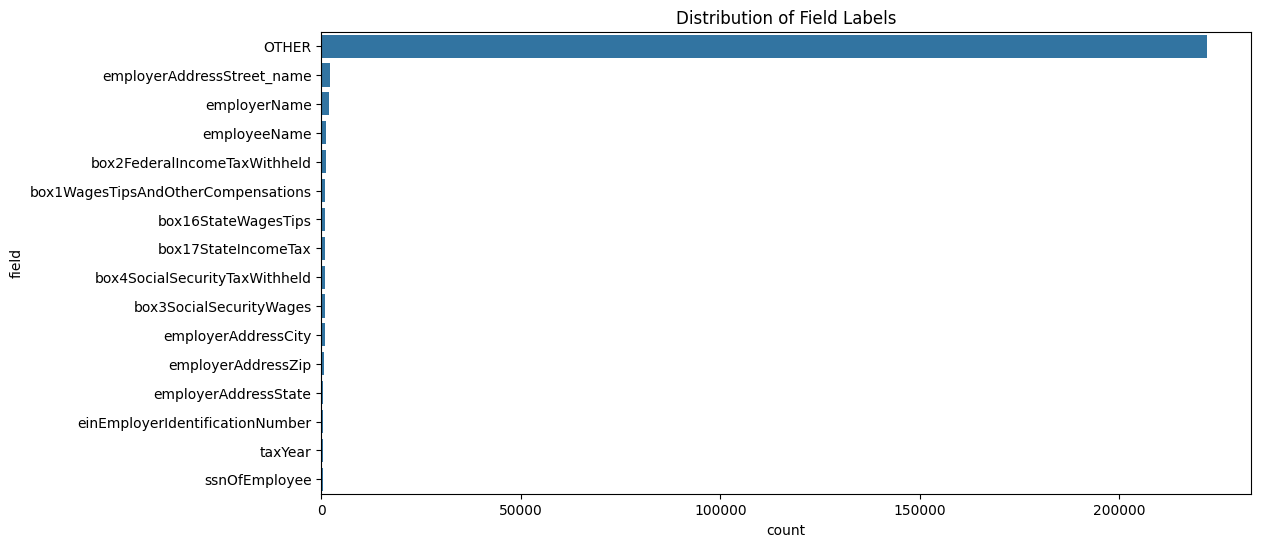

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of 'field' labels
plt.figure(figsize=(12, 6))
sns.countplot(y='field', data=combined_df, order=combined_df['field'].value_counts().index)
plt.title('Distribution of Field Labels')
plt.show()

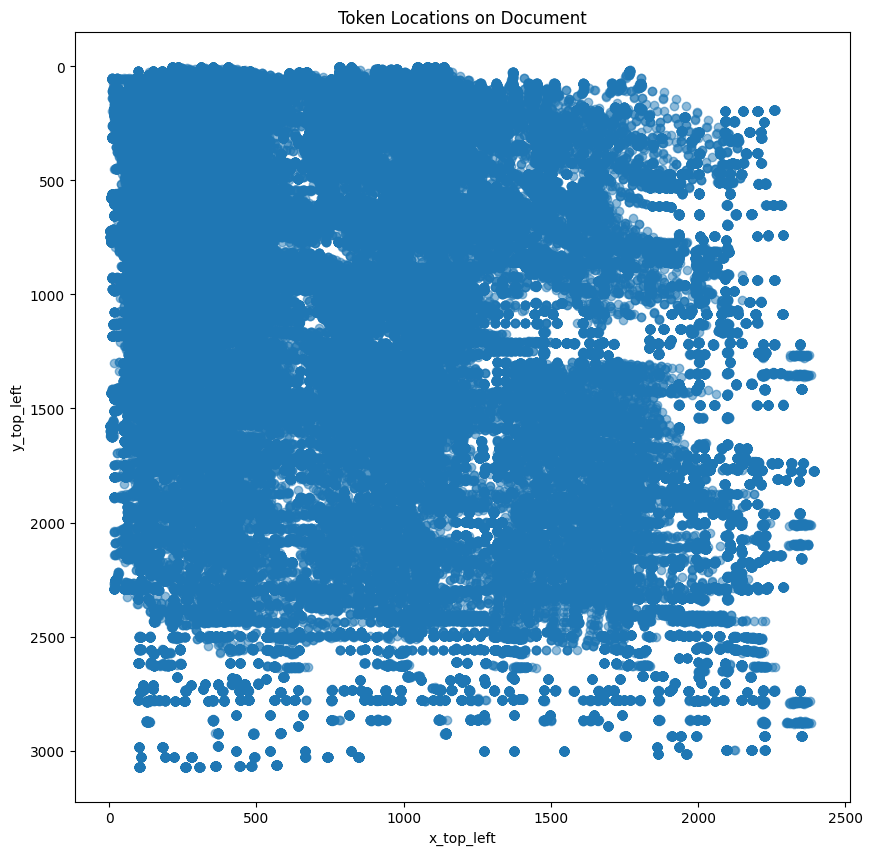

In [ ]:
# Scatter plot of token locations
plt.figure(figsize=(10, 10))
plt.scatter(combined_df['x_top_left'], combined_df['y_top_left'], alpha=0.5)
plt.title('Token Locations on Document')
plt.xlabel('x_top_left')
plt.ylabel('y_top_left')
plt.gca().invert_yaxis()  # Invert y-axis to match document coordinates
plt.show()


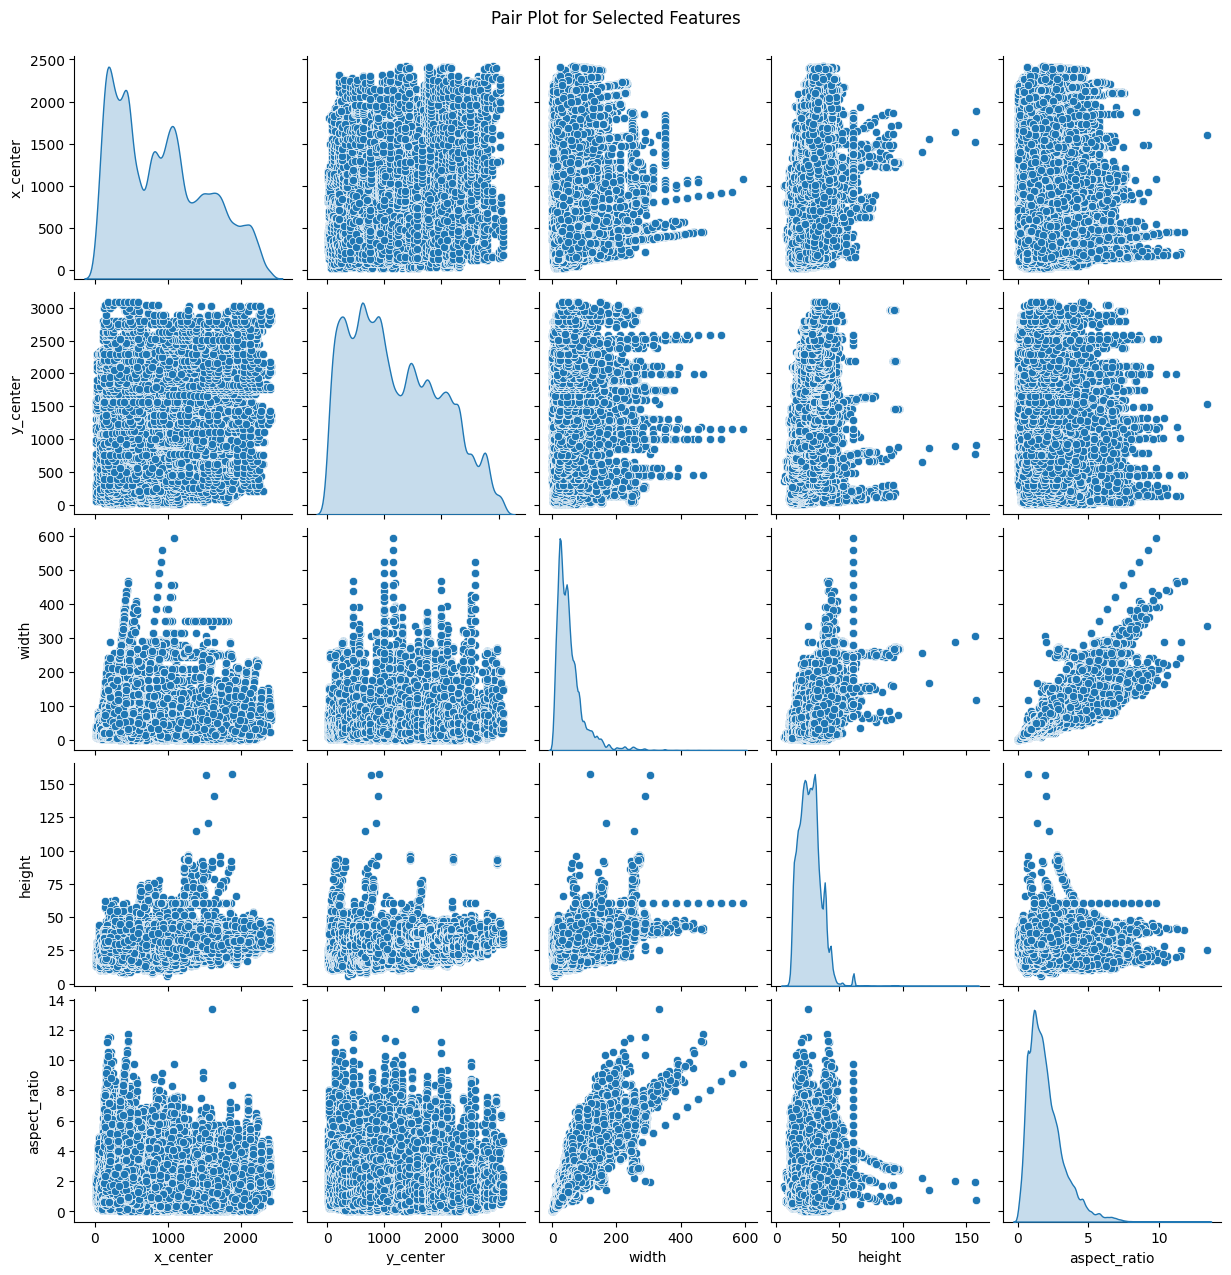

In [ ]:
# Pairplot for selected columns (for faster visualization, limit the columns)
sample_columns = ['x_center', 'y_center', 'width', 'height', 'aspect_ratio']
sns.pairplot(combined_df[sample_columns], diag_kind='kde')
plt.suptitle('Pair Plot for Selected Features', y=1.02)
plt.show()


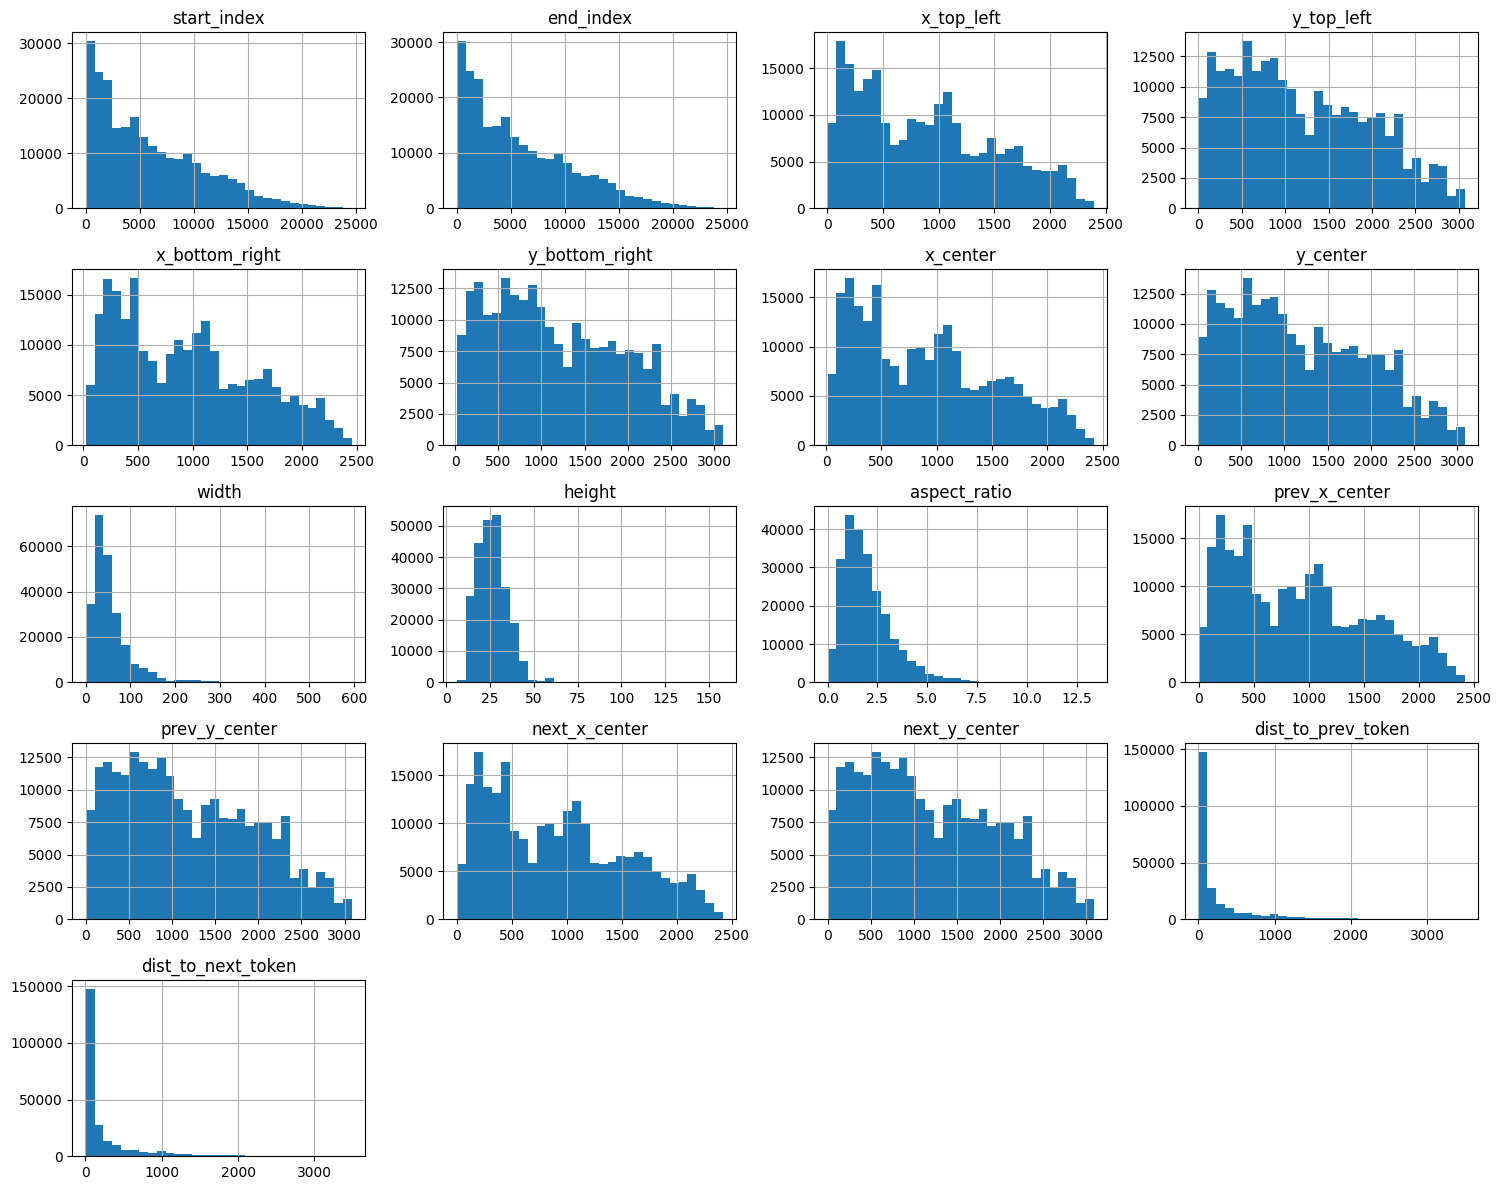

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_columns = [
    'start_index', 'end_index', 'x_top_left', 'y_top_left', 'x_bottom_right',
    'y_bottom_right', 'x_center', 'y_center', 'width', 'height',
    'aspect_ratio', 'prev_x_center', 'prev_y_center', 'next_x_center',
    'next_y_center', 'dist_to_prev_token', 'dist_to_next_token'
]

# Plot histograms for each numeric column
combined_df[numeric_columns].hist(bins=30, figsize=(15, 12), layout=(5, 4))
plt.tight_layout()
plt.show()


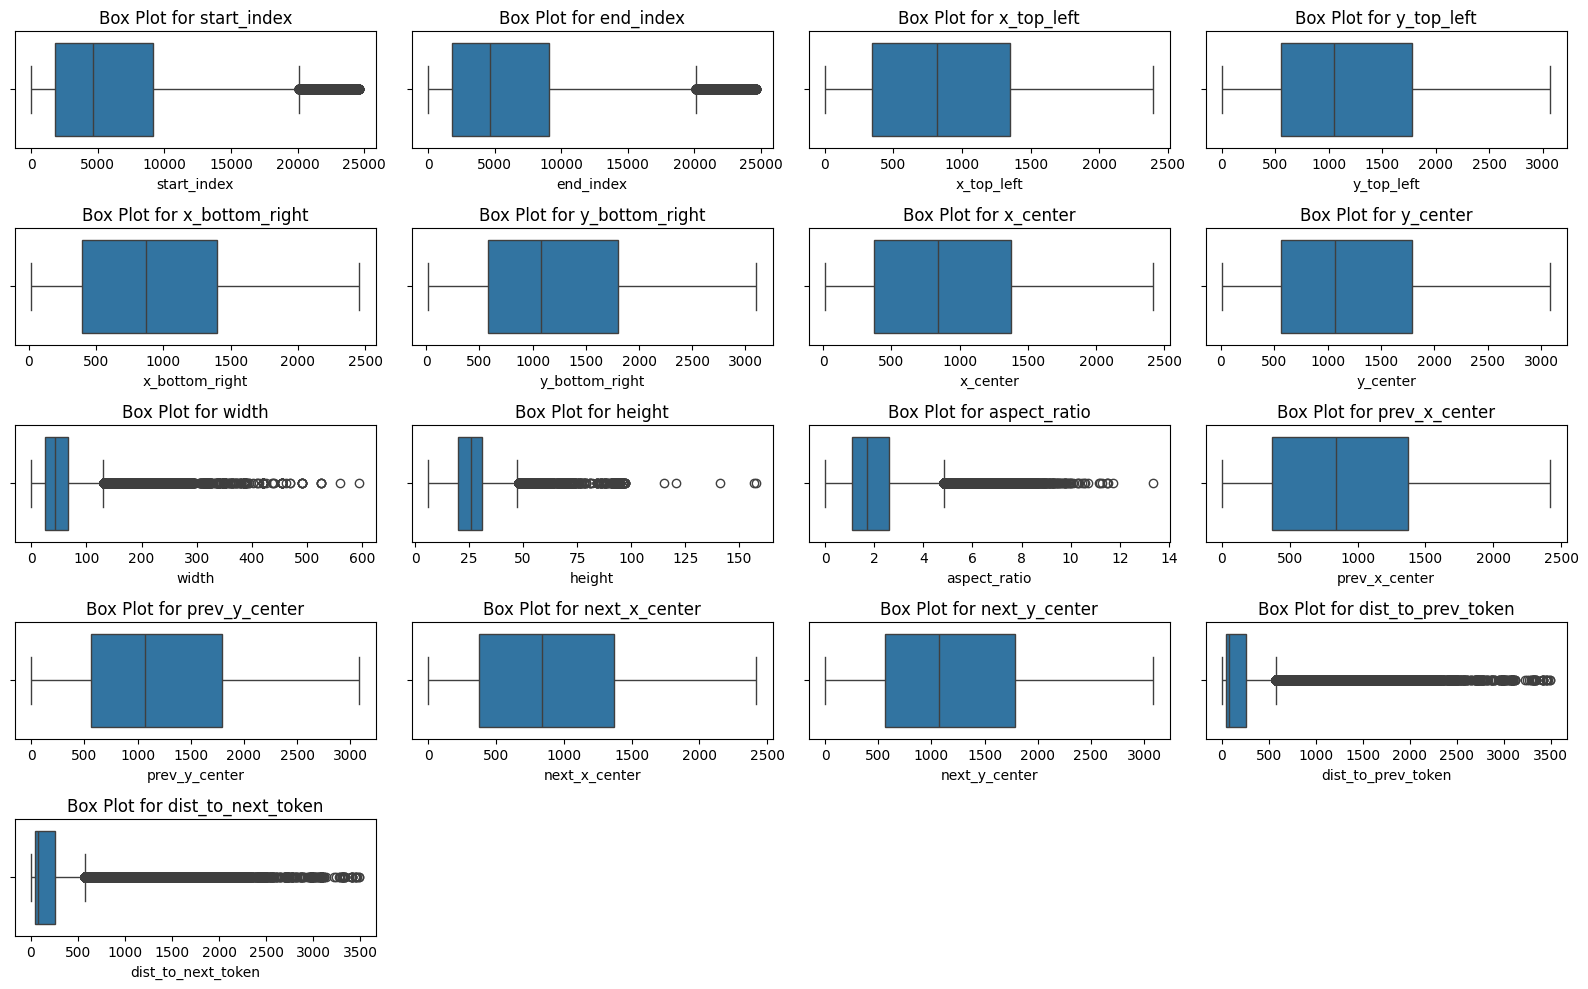

In [ ]:
# Plot boxplots for each numeric column
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=combined_df, x=col)
    plt.title(f'Box Plot for {col}')
plt.tight_layout()
plt.show()


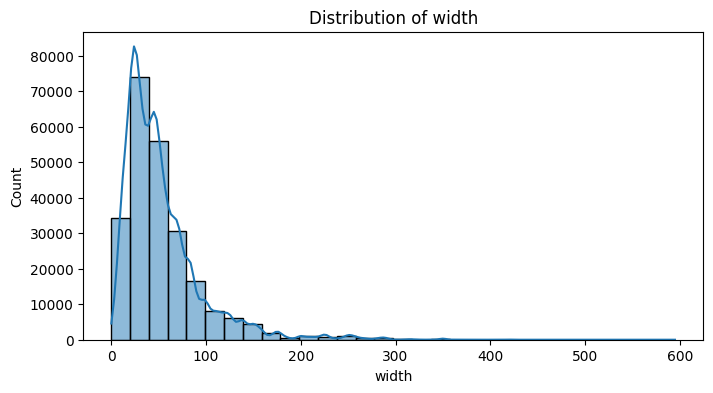

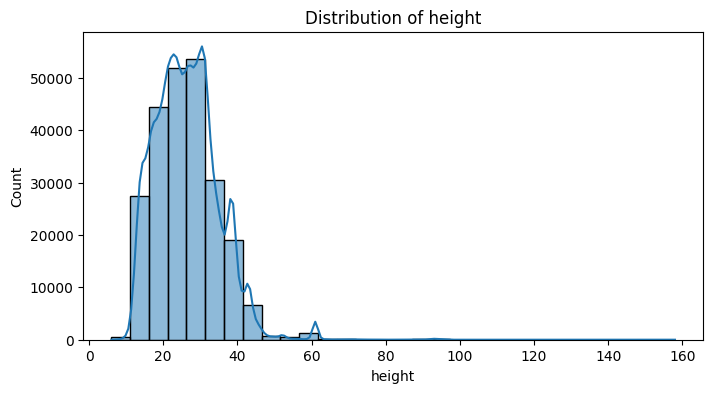

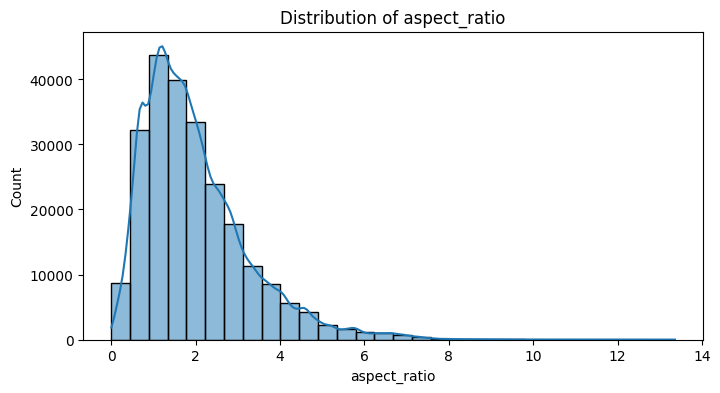

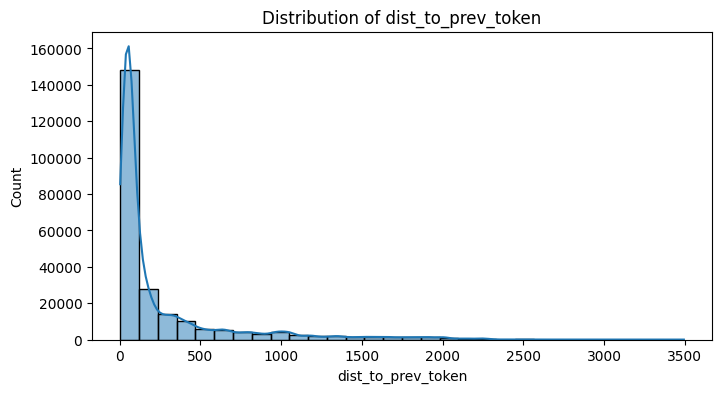

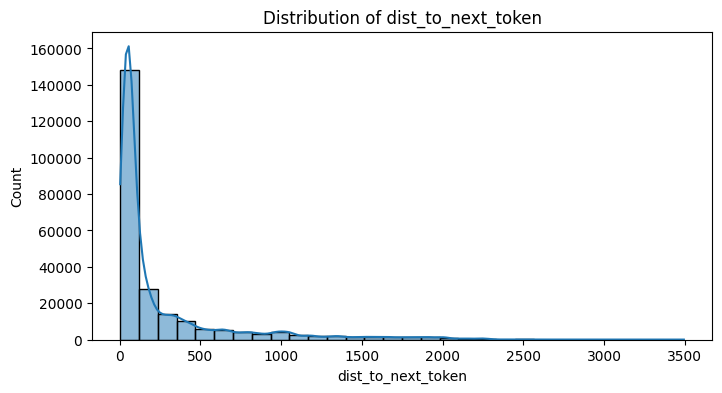

In [ ]:
# Distribution plots for selected columns
for col in ['width', 'height', 'aspect_ratio', 'dist_to_prev_token', 'dist_to_next_token']:
    plt.figure(figsize=(8, 4))
    sns.histplot(combined_df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237016 entries, 0 to 237015
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   start_index         237016 non-null  int64  
 1   end_index           237016 non-null  int64  
 2   x_top_left          237016 non-null  float64
 3   y_top_left          237016 non-null  float64
 4   x_bottom_right      237016 non-null  float64
 5   y_bottom_right      237016 non-null  float64
 6   transcript          237016 non-null  object 
 7   field               237016 non-null  object 
 8   x_center            237016 non-null  float64
 9   y_center            237016 non-null  float64
 10  width               237016 non-null  float64
 11  height              237016 non-null  float64
 12  aspect_ratio        237016 non-null  float64
 13  prev_transcript     237016 non-null  object 
 14  next_transcript     237016 non-null  object 
 15  prev_x_center       237016 non-nul

## DATA PREPROCESSING

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only the numeric columns
numeric_cols = ['x_top_left', 'y_top_left', 'x_center', 'y_center', 'width', 'height', 'aspect_ratio',
                'dist_to_prev_token', 'dist_to_next_token']

# Standardize the numeric features
scaler = StandardScaler()
combined_df[numeric_cols] = scaler.fit_transform(combined_df[numeric_cols])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
combined_df['transcript'] = label_encoder.fit_transform(combined_df['transcript'])
combined_df['prev_transcript'] = label_encoder.fit_transform(combined_df['prev_transcript'])
combined_df['next_transcript'] = label_encoder.fit_transform(combined_df['next_transcript'])

In [ ]:
print(combined_df.dtypes)

start_index             int64
end_index               int64
x_top_left            float64
y_top_left            float64
x_bottom_right        float64
y_bottom_right        float64
transcript              int64
field                  object
x_center              float64
y_center              float64
width                 float64
height                float64
aspect_ratio          float64
prev_transcript         int64
next_transcript         int64
prev_x_center         float64
prev_y_center         float64
next_x_center         float64
next_y_center         float64
dist_to_prev_token    float64
dist_to_next_token    float64
dtype: object


In [ ]:
combined_df['field'].value_counts(normalize=True)

,proportion
field,
OTHER,0.936574
employerAddressStreet_name,0.009523
employerName,0.008240
employeeName,0.004738
box2FederalIncomeTaxWithheld,0.004662
box1WagesTipsAndOtherCompensations,0.004401
box16StateWagesTips,0.004396
box17StateIncomeTax,0.004312
box4SocialSecurityTaxWithheld,0.004253


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237016 entries, 0 to 237015
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   start_index         237016 non-null  int64  
 1   end_index           237016 non-null  int64  
 2   x_top_left          237016 non-null  float64
 3   y_top_left          237016 non-null  float64
 4   x_bottom_right      237016 non-null  float64
 5   y_bottom_right      237016 non-null  float64
 6   transcript          237016 non-null  int64  
 7   field               237016 non-null  object 
 8   x_center            237016 non-null  float64
 9   y_center            237016 non-null  float64
 10  width               237016 non-null  float64
 11  height              237016 non-null  float64
 12  aspect_ratio        237016 non-null  float64
 13  prev_transcript     237016 non-null  int64  
 14  next_transcript     237016 non-null  int64  
 15  prev_x_center       237016 non-nul

In [ ]:
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight

# Example DataFrame
df = combined_df.copy()

# Calculate class weights
class_labels = df['field'].unique()
class_weights = compute_class_weight('balanced', classes=class_labels, y=df['field'])
class_weight_dict = {label: weight for label, weight in zip(class_labels, class_weights)}
print("Class Weights:", class_weight_dict)

Class Weights: {'OTHER': 0.06673258763058433, 'box1WagesTipsAndOtherCompensations': 14.202780441035475, 'box2FederalIncomeTaxWithheld': 13.405882352941177, 'box3SocialSecurityWages': 15.131256384065372, 'box4SocialSecurityTaxWithheld': 14.69593253968254, 'employerName': 7.584997439836149, 'employerAddressStreet_name': 6.563358440407621, 'employerAddressCity': 17.635119047619046, 'employerAddressState': 26.83605072463768, 'employerAddressZip': 25.897727272727273, 'einEmployerIdentificationNumber': 27.432407407407407, 'employeeName': 13.191006233303652, 'box16StateWagesTips': 14.216410748560461, 'box17StateIncomeTax': 14.494618395303327, 'taxYear': 27.48330241187384, 'ssnOfEmployee': 32.3438864628821}


In [ ]:
y=combined_df['field']
X=combined_df.drop(columns="field",axis=1)

## MODEL TRAINING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
log_reg1 = LogisticRegression(max_iter=1000, class_weight=class_weight_dict)
log_reg1.fit(X, y)

# Make predictions
y_pred = log_reg1.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.3687852296891349
Classification Report:
                                    precision    recall  f1-score   support

                             OTHER       0.99      0.37      0.53    221983
               box16StateWagesTips       0.02      0.37      0.03      1042
               box17StateIncomeTax       0.02      0.38      0.04      1022
box1WagesTipsAndOtherCompensations       0.03      0.32      0.06      1043
      box2FederalIncomeTaxWithheld       0.04      0.37      0.08      1105
           box3SocialSecurityWages       0.03      0.19      0.06       979
     box4SocialSecurityTaxWithheld       0.03      0.42      0.06      1008
   einEmployerIdentificationNumber       0.13      0.69      0.22       540
                      employeeName       0.03      0.52      0.05      1123
               employerAddressCity       0.06      0.49      0.11       840
              employerAddressState       0.06      0.68      0.11       552
        employerAddressStreet_name 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_classifier=RandomForestClassifier(random_state=42,class_weight=class_weight_dict)

In [ ]:
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

In [ ]:
grid_search3 = GridSearchCV(rf_classifier, param_grid, cv=3, n_jobs=-1)
grid_search3.fit(X,y)
y_pred = grid_search3.predict(X)

In [ ]:
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

## PRE-PROCESSING ON VALIDATION SET

In [ ]:
folder_path = '/content/dataset/val/boxes_transcripts'

# List all TSV files in the folder
tsv_files = [f for f in os.listdir(folder_path) if f.endswith('.tsv')]

# Load each TSV file into a pandas DataFrame
dataframes = {}
for file in tsv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, sep=',')
    df.columns=["start_index", "end_index", "x_top_left", "y_top_left",
                "x_bottom_right", "y_bottom_right", "transcript"]
    dataframes[file] = df

# (Optional) Concatenate all DataFrames into a single one
val_df = pd.concat(dataframes.values(), ignore_index=True)

# Display the combined DataFrame
print(val_df)

       start_index  end_index  x_top_left  y_top_left  x_bottom_right  \
0                0          0        1012        2051            1100   
1                0          0        1699        2107            1746   
2                0          0        1698        2157            1769   
3              101        104         784          31             891   
4              106        108         906          32             994   
...            ...        ...         ...         ...             ...   
80241        11023      11025         307        3070             354   
80242        11027      11030         361        3069             436   
80243        11032      11033         443        3068             475   
80244        11035      11038         481        3066             561   
80245        11040      11043         568        3065             617   

       y_bottom_right transcript  
0                2075  "81211.83  
1                2129     169128  
2                2

In [ ]:
print(val_df.head())

   start_index  end_index  x_top_left  y_top_left  x_bottom_right  \
0            0          0        1012        2051            1100   
1            0          0        1699        2107            1746   
2            0          0        1698        2157            1769   
3          101        104         784          31             891   
4          106        108         906          32             994   

   y_bottom_right transcript  
0            2075  "81211.83  
1            2129     169128  
2            2183   Brittany  
3              71       2018  
4              72        W-2  


In [ ]:
print(val_df.shape)

(80246, 7)


In [ ]:
print(val_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80246 entries, 0 to 80245
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   start_index     80246 non-null  int64 
 1   end_index       80246 non-null  int64 
 2   x_top_left      80246 non-null  int64 
 3   y_top_left      80246 non-null  int64 
 4   x_bottom_right  80246 non-null  int64 
 5   y_bottom_right  80246 non-null  int64 
 6   transcript      80230 non-null  object
dtypes: int64(6), object(1)
memory usage: 4.3+ MB
None


In [ ]:
print(val_df.isnull().sum())

start_index        0
end_index          0
x_top_left         0
y_top_left         0
x_bottom_right     0
y_bottom_right     0
transcript        16
dtype: int64


In [ ]:
val_df["transcript"].fillna("",inplace=True)

In [ ]:
print(val_df.isnull().sum())

start_index       0
end_index         0
x_top_left        0
y_top_left        0
x_bottom_right    0
y_bottom_right    0
transcript        0
dtype: int64


In [ ]:
val_df['transcript'] = val_df['transcript'].astype(str)

In [ ]:
# Top-left corner coordinates
val_df['x_top_left'] = val_df['x_top_left'].astype(float)
val_df['y_top_left'] = val_df['y_top_left'].astype(float)

# Bottom-right corner coordinates
val_df['x_bottom_right'] = val_df['x_bottom_right'].astype(float)
val_df['y_bottom_right'] = val_df['y_bottom_right'].astype(float)

# Center coordinates
val_df['x_center'] = (val_df['x_top_left'] + val_df['x_bottom_right']) / 2
val_df['y_center'] = (val_df['y_top_left'] + val_df['y_bottom_right']) / 2

In [ ]:
# Width of the bounding box
val_df['width'] = val_df['x_bottom_right'] - val_df['x_top_left']

# Height of the bounding box
val_df['height'] = val_df['y_bottom_right'] - val_df['y_top_left']

# Aspect ratio (width to height ratio)
val_df['aspect_ratio'] = val_df['width'] / val_df['height']


In [ ]:
# Previous token's transcript
val_df['prev_transcript'] = val_df['transcript'].shift(1).fillna('')

# Next token's transcript
val_df['next_transcript'] = val_df['transcript'].shift(-1).fillna('')

In [ ]:
# Previous token's coordinates
val_df['prev_x_center'] = val_df['x_center'].shift(1).fillna(0)
val_df['prev_y_center'] = val_df['y_center'].shift(1).fillna(0)

# Next token's coordinates
val_df['next_x_center'] = val_df['x_center'].shift(-1).fillna(0)
val_df['next_y_center'] = val_df['y_center'].shift(-1).fillna(0)

# Distance to previous token
val_df['dist_to_prev_token'] = ((val_df['x_center'] - val_df['prev_x_center'])**2 +
                                     (val_df['y_center'] - val_df['prev_y_center'])**2)**0.5

# Distance to next token
val_df['dist_to_next_token'] = ((val_df['x_center'] - val_df['next_x_center'])**2 +
                                     (val_df['y_center'] - val_df['next_y_center'])**2)**0.5

In [ ]:
print(val_df.head())

   start_index  end_index  x_top_left  y_top_left  x_bottom_right  \
0            0          0      1012.0      2051.0          1100.0   
1            0          0      1699.0      2107.0          1746.0   
2            0          0      1698.0      2157.0          1769.0   
3          101        104       784.0        31.0           891.0   
4          106        108       906.0        32.0           994.0   

   y_bottom_right transcript  x_center  y_center  width  height  aspect_ratio  \
0          2075.0  "81211.83    1056.0    2063.0   88.0    24.0      3.666667   
1          2129.0     169128    1722.5    2118.0   47.0    22.0      2.136364   
2          2183.0   Brittany    1733.5    2170.0   71.0    26.0      2.730769   
3            71.0       2018     837.5      51.0  107.0    40.0      2.675000   
4            72.0        W-2     950.0      52.0   88.0    40.0      2.200000   

  prev_transcript next_transcript  prev_x_center  prev_y_center  \
0                          1691

In [ ]:
print(val_df.isnull().sum())

start_index           0
end_index             0
x_top_left            0
y_top_left            0
x_bottom_right        0
y_bottom_right        0
transcript            0
x_center              0
y_center              0
width                 0
height                0
aspect_ratio          0
prev_transcript       0
next_transcript       0
prev_x_center         0
prev_y_center         0
next_x_center         0
next_y_center         0
dist_to_prev_token    0
dist_to_next_token    0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only the numeric columns
numeric_cols = ['x_top_left', 'y_top_left', 'x_center', 'y_center', 'width', 'height', 'aspect_ratio',
                'dist_to_prev_token', 'dist_to_next_token']
scaler = StandardScaler()
# Standardize the numeric features

val_df[numeric_cols] = scaler.fit_transform(val_df[numeric_cols])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
val_df['transcript'] = label_encoder.fit(val_df['transcript'])
val_df['prev_transcript'] = label_encoder.fit(val_df['prev_transcript'])
val_df['next_transcript'] = label_encoder.fit(val_df['next_transcript'])

In [ ]:
y_prediction1=pd.DataFrame(log_reg1.predict(val_df))
y_prediction1.columns=['field']

In [ ]:
val_df['field']=y_prediction1

In [ ]:
# Save predictions to TSV
val_df.to_csv('/content/drive/MyDrive/InfrrdMLintern/val_predictions.tsv', sep='\t', index=False)

In [ ]:
import os
import pandas as pd
# Folder containing TSV files
folder_path = '/content/dataset/val_w_ann/boxes_transcripts_labels'

# List all TSV files in the folder
tsv_files = [f for f in os.listdir(folder_path) if f.endswith('.tsv')]

# Load each TSV file into a pandas DataFrame
dataframes = {}
for file in tsv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, sep=',')
    df.columns=["start_index", "end_index", "x_top_left", "y_top_left",
                "x_bottom_right", "y_bottom_right", "transcript", "field"]
    dataframes[file] = df

# (Optional) Concatenate all DataFrames into a single one
val_w_ann_df = pd.concat(dataframes.values(), ignore_index=True)

# Display the combined DataFrame
print(val_w_ann_df)

In [ ]:
val_w_ann_df.to_csv('/content/drive/MyDrive/Infrrd ML intern/val_w_ann.tsv', sep='\t', index=False)

In [131]:
!python eval_copy.py --pred_file /content/drive/MyDrive/InfrrdMLintern/val_predictions.tsv --true_file /content/drive/MyDrive/InfrrdMLintern/val_w_ann.tsv


    Precision  Recall  F1-Score  Support
0         1.0     1.0       1.0     1043
1         1.0     1.0       1.0     1106
2         1.0     1.0       1.0      979
3         1.0     1.0       1.0     1009
4         1.0     1.0       1.0     1954
5         1.0     1.0       1.0     2260
6         1.0     1.0       1.0      840
7         1.0     1.0       1.0      552
8         1.0     1.0       1.0      572
9         1.0     1.0       1.0      542
10        1.0     1.0       1.0     1123
11        1.0     1.0       1.0     1043
12        1.0     1.0       1.0     1023
13        1.0     1.0       1.0      546
14        1.0     1.0       1.0      476
